# practice 3. 다중 선형 회귀, ridge, lasso

데이터 셋 링크: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

펭귄들의 종, 서식 지역, 부리 길이와 부리 깊이, 날개(?) 사이즈, 성별, 그리고 몸무게 데이터 셋이 있습니다. 다중 회귀 분석, 라쏘, 릿지 리그레션을 이용해서 몸무게를 예측하는 회귀 모델을 만들고, 어떤 독립변수가 가장 몸무게에 영향을 많이 미치는지 찾아보세요.

![image.png](attachment:0c2f6afa-fbe4-4cc5-8d2e-8d229689c5c8.png)

In [84]:
import pandas as pd
from matplotlib import pyplot as plt

from matplotlib import font_manager, rc
font_path = r"C:\WINDOWS\FONTS\MALGUN.TTF" #폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [9]:
from sklearn.model_selection import train_test_split

In [48]:
df = pd.read_csv("./data/penguins.csv")

In [50]:
df = df.dropna()

In [52]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [53]:
df = df[df["sex"] != "."]

In [98]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [55]:
#테스트셋 트레인셋 분리
df = df.dropna(subset="body_mass_g")
X = df.drop(["body_mass_g"], axis=1)
y = df["body_mass_g"]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)

In [56]:
columns_list = x_train.columns.to_list()

In [59]:
columns_list

['species',
 'island',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'sex']

In [60]:
x_test

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex
155,Chinstrap,Dream,45.4,18.7,188.0,FEMALE
329,Gentoo,Biscoe,48.1,15.1,209.0,MALE
275,Gentoo,Biscoe,45.0,15.4,220.0,MALE
98,Adelie,Dream,33.1,16.1,178.0,FEMALE
143,Adelie,Dream,40.7,17.0,190.0,MALE
...,...,...,...,...,...,...
73,Adelie,Torgersen,45.8,18.9,197.0,MALE
338,Gentoo,Biscoe,47.2,13.7,214.0,FEMALE
121,Adelie,Torgersen,37.7,19.8,198.0,MALE
124,Adelie,Torgersen,35.2,15.9,186.0,FEMALE


In [58]:
for column in columns_list:
    print(f"{column} 칼럼 기초 통계량")
    print(x_train[column].describe())
    print("")

species 칼럼 기초 통계량
count        266
unique         3
top       Adelie
freq         112
Name: species, dtype: object

island 칼럼 기초 통계량
count        266
unique         3
top       Biscoe
freq         135
Name: island, dtype: object

culmen_length_mm 칼럼 기초 통계량
count    266.000000
mean      44.262406
std        5.568227
min       32.100000
25%       39.525000
50%       45.100000
75%       49.000000
max       59.600000
Name: culmen_length_mm, dtype: float64

culmen_depth_mm 칼럼 기초 통계량
count    266.000000
mean      17.139098
std        1.984652
min       13.100000
25%       15.500000
50%       17.300000
75%       18.700000
max       21.500000
Name: culmen_depth_mm, dtype: float64

flipper_length_mm 칼럼 기초 통계량
count    266.000000
mean     201.567669
std       14.270603
min      172.000000
25%      190.000000
50%      198.000000
75%      214.000000
max      231.000000
Name: flipper_length_mm, dtype: float64

sex 칼럼 기초 통계량
count      266
unique       2
top       MALE
freq       137
Name: sex, dtyp

## EDA

### 칼럼별 시각화

In [25]:
color_list = ["#D0894B", "#D9B45D", "#253542", "#2B4753", "#DBE3ED", "#F6F6F6"]

In [17]:
import seaborn as sns

In [46]:
from collections import Counter

species_counter = Counter(x_train["species"])
island_counter = Counter(x_train["island"])
sex_counter = Counter(x_train["sex"])

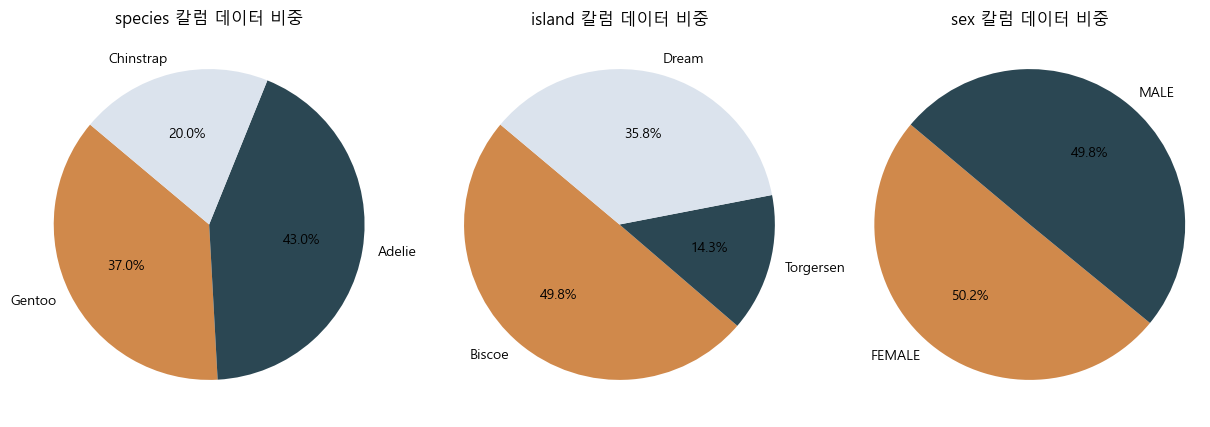

In [47]:
#범주형 칼럼 시각화
plt.figure(figsize=(15, 5))  # 전체 figure 크기 설정

plt.subplot(131)
plt.pie(species_counter.values(), labels=species_counter.keys(), autopct='%1.1f%%', startangle=140, colors=["#D0894B", "#2B4753", "#DBE3ED"])
plt.axis('equal')  # 원의 형태를 유지함
plt.title("species 칼럼 데이터 비중")

plt.subplot(132)
plt.pie(island_counter.values(), labels=island_counter.keys(), autopct='%1.1f%%', startangle=140, colors=["#D0894B", "#2B4753", "#DBE3ED"])
plt.axis('equal')  # 원의 형태를 유지함
plt.title("island 칼럼 데이터 비중")

plt.subplot(133)
plt.pie(sex_counter.values(), labels=sex_counter.keys(), autopct='%1.1f%%', startangle=140, colors=["#D0894B", "#2B4753"])
plt.axis('equal')  # 원의 형태를 유지함
plt.title("sex 칼럼 데이터 비중")

plt.show()

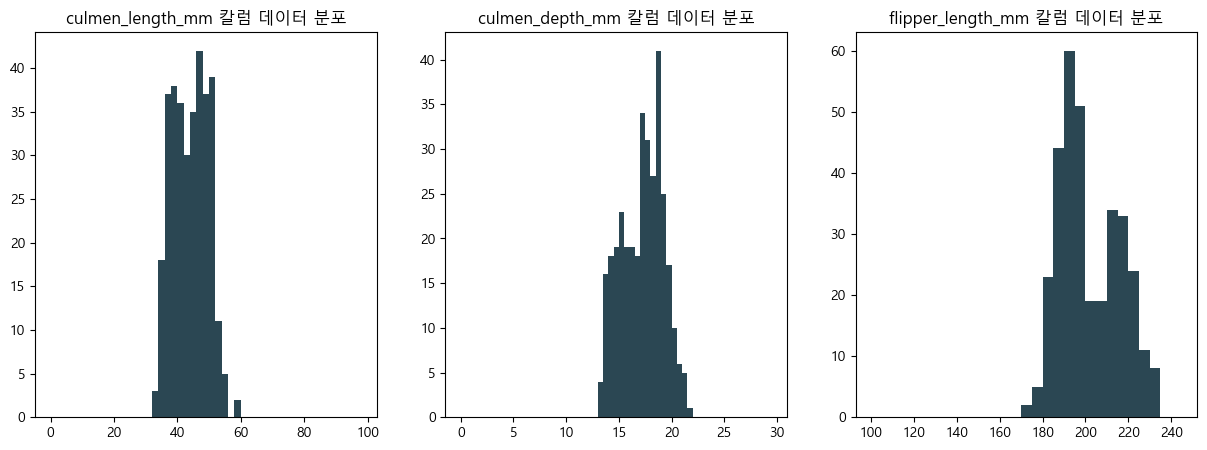

In [71]:
#연속형 변수
import numpy as np

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.hist(x=df["culmen_length_mm"], bins=np.arange(0,100,2), color="#2B4753")
plt.title("culmen_length_mm 칼럼 데이터 분포")

plt.subplot(1,3,2)
plt.hist(x=df["culmen_depth_mm"], bins=np.arange(0, 30, 0.5), color="#2B4753")
plt.title("culmen_depth_mm 칼럼 데이터 분포")

plt.subplot(1,3,3)
plt.hist(x=df["flipper_length_mm"], bins=np.arange(100, 250, 5), color="#2B4753")
plt.title("flipper_length_mm 칼럼 데이터 분포")

plt.show()

In [128]:
y_train.describe()

count     266.000000
mean     4244.360902
std       809.315554
min      2700.000000
25%      3600.000000
50%      4087.500000
75%      4850.000000
max      6300.000000
Name: body_mass_g, dtype: float64

Text(0.5, 1.0, 'body_mass_g 칼럼(종속변수) 데이터 분포')

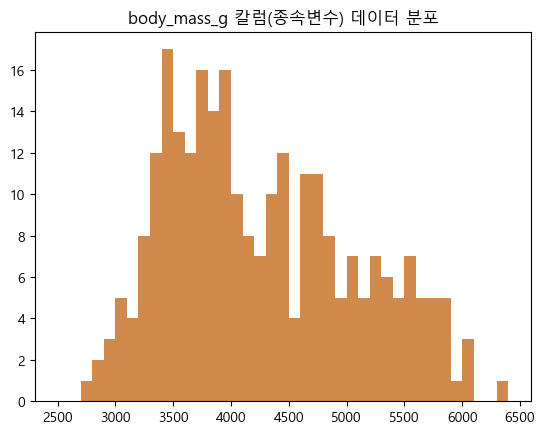

In [131]:
plt.hist(x=y_train, bins=np.arange(2500,6500,100), color="#D0894B")
plt.title("body_mass_g 칼럼(종속변수) 데이터 분포")


### 데이터 전처리

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

In [73]:
#범주형 변수 원핫 인코딩
x_test_preprocessed = pd.get_dummies(x_test, columns=['species', 'island', 'sex'])

In [72]:
x_train_preprocessed = pd.get_dummies(x_train, columns=['species', 'island', 'sex'])

In [74]:
x_train_preprocessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
7,39.2,19.6,195.0,1,0,0,0,0,1,0,1
264,50.5,15.9,222.0,0,0,1,1,0,0,0,1
138,37.0,16.5,185.0,1,0,0,0,1,0,1,0
28,37.9,18.6,172.0,1,0,0,1,0,0,1,0
152,46.5,17.9,192.0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
210,50.2,18.8,202.0,0,1,0,0,1,0,0,1
59,37.6,19.1,194.0,1,0,0,1,0,0,0,1
302,47.4,14.6,212.0,0,0,1,1,0,0,1,0
217,49.6,18.2,193.0,0,1,0,0,1,0,0,1


In [ ]:
x_train["price"] = y_train
plt.figure(figsize=(12,8))
sns.heatmap(
    x_train.corr(),
    annot=True,
    fmt=".2f",
    linewidth=0.5,
    annot_kws={"size": 7},
)

In [76]:
y_train

7      4675.0
264    5550.0
138    3400.0
28     3150.0
152    3500.0
        ...  
210    3800.0
59     3750.0
302    4725.0
217    3775.0
311    5400.0
Name: body_mass_g, Length: 266, dtype: float64

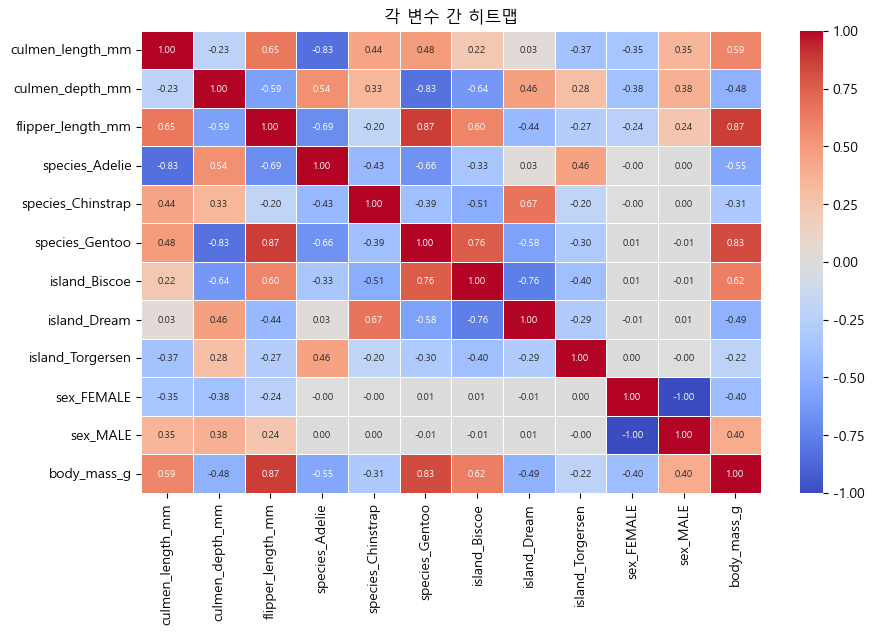

In [85]:
#독립 변수 선택을 위한 상관계수 측정

x_train_preprocessed["body_mass_g"] = y_train

plt.figure(figsize=(10,6))
sns.heatmap(
    x_train_preprocessed.corr(),
    annot=True,
    fmt=".2f",
    linewidth=0.5,
    annot_kws={"size": 7},
    cmap="coolwarm",
)
plt.title("각 변수 간 히트맵")
plt.show()

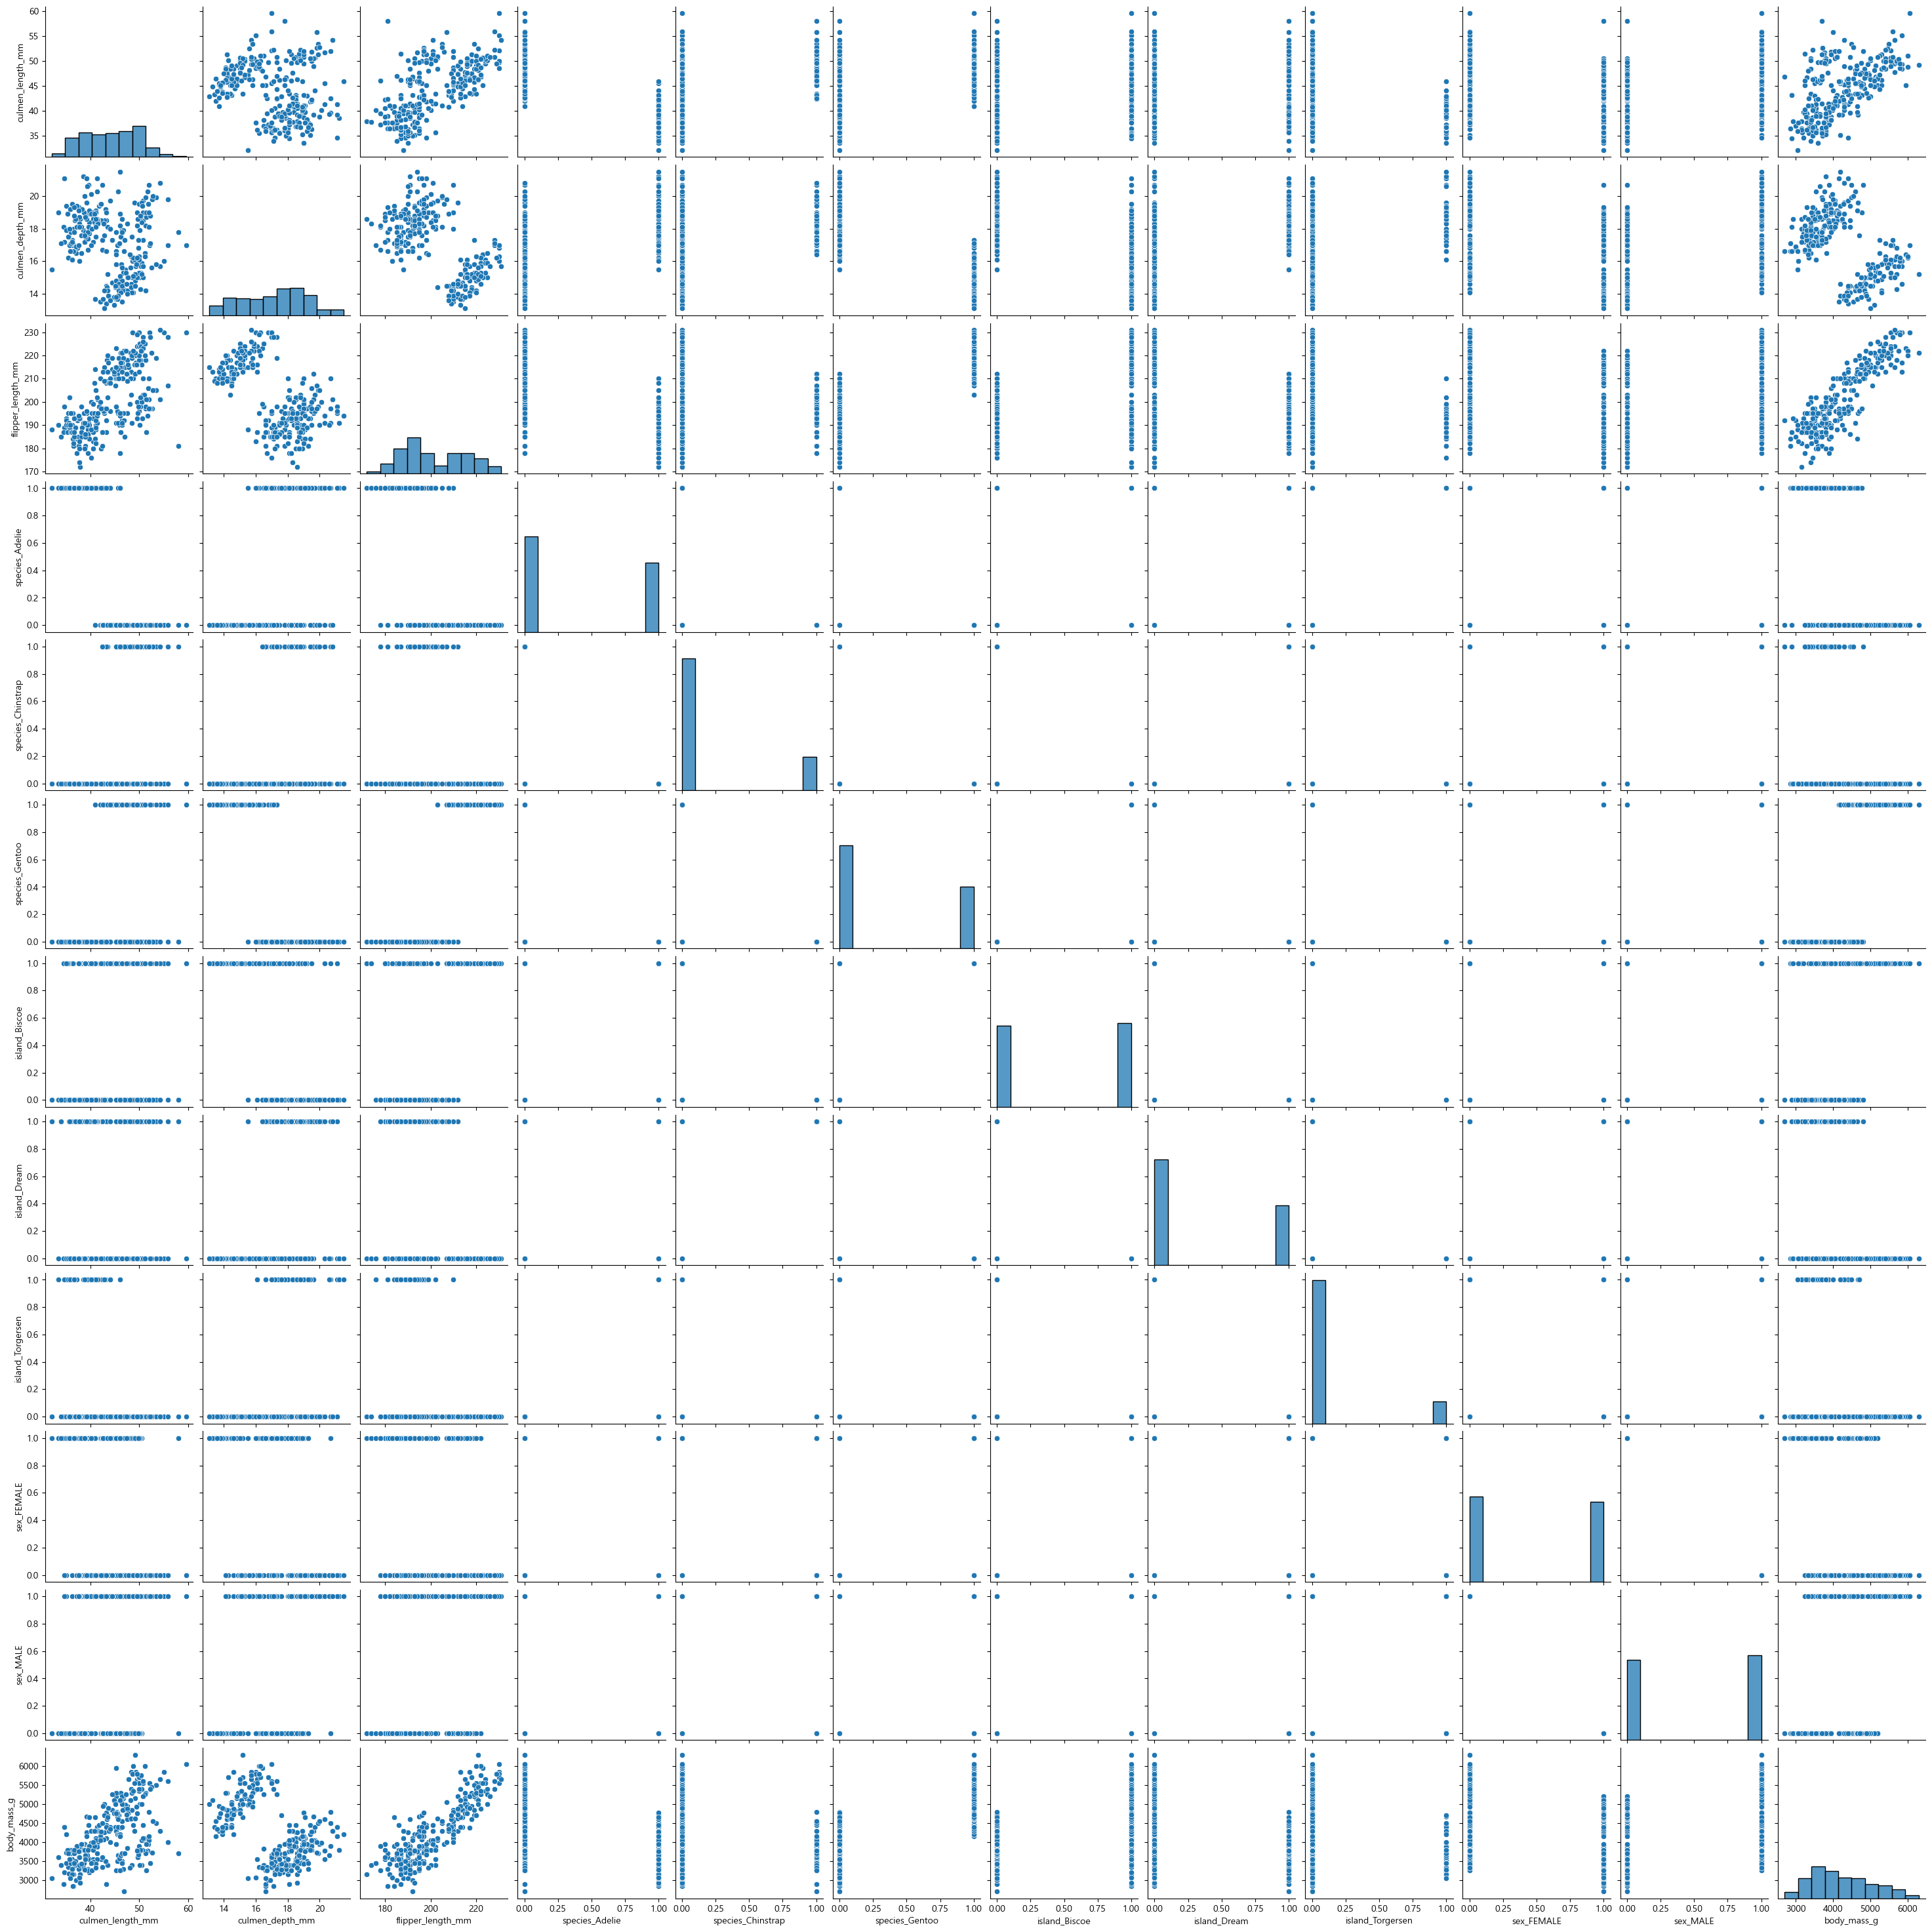

In [105]:
sns.pairplot(x_train_preprocessed)
plt.savefig("./data/penguin_pairplot.png")
plt.show()

## 회귀 분석

### 다중 선형 회귀

In [99]:
x_train_preprocessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE,body_mass_g
7,39.2,19.6,195.0,1,0,0,0,0,1,0,1,4675.0
264,50.5,15.9,222.0,0,0,1,1,0,0,0,1,5550.0
138,37.0,16.5,185.0,1,0,0,0,1,0,1,0,3400.0
28,37.9,18.6,172.0,1,0,0,1,0,0,1,0,3150.0
152,46.5,17.9,192.0,0,1,0,0,1,0,1,0,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,50.2,18.8,202.0,0,1,0,0,1,0,0,1,3800.0
59,37.6,19.1,194.0,1,0,0,1,0,0,0,1,3750.0
302,47.4,14.6,212.0,0,0,1,1,0,0,1,0,4725.0
217,49.6,18.2,193.0,0,1,0,0,1,0,0,1,3775.0


In [115]:
import statsmodels.api as sm

def train_linear_regression(X, y):
    X_constant = sm.add_constant(X, has_constant="add")
    model = sm.OLS(y, X_constant)
    results = model.fit()
    return results, X_constant

In [135]:
selected_x_train = x_train_preprocessed[["species_Adelie","species_Chinstrap", "species_Gentoo"]] #독립변수 3개
results, x_constant_train = train_linear_regression(selected_x_train, y_train)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     280.4
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           6.24e-66
Time:                        15:55:43   Log-Likelihood:                -2006.3
No. Observations:                 266   AIC:                             4019.
Df Residuals:                     263   BIC:                             4029.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3141.2489     22.20

### 성능 측정

In [120]:
#테스트셋에 대한 적합도 검정

selected_x_test = x_test_preprocessed[["species_Adelie","species_Chinstrap", "species_Gentoo"]] #독립변수 3개
results, x_constant_test = train_linear_regression(selected_x_test, y_test)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     56.11
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           8.41e-15
Time:                        15:13:46   Log-Likelihood:                -506.55
No. Observations:                  67   AIC:                             1019.
Df Residuals:                      64   BIC:                             1026.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3099.0215     46.57

In [122]:
y_train_pred = results.predict(x_constant_train)
y_test_pred = results.predict(x_constant_test)

In [124]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("train set R2:", r2_score(y_train, y_train_pred))
print("train set RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("test set R2:", r2_score(y_test, y_test_pred))
print("test set RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

train set R2: 0.6753820242706103
train set RMSE: 460.2420422824737
test set R2: 0.6367986604696716
test set RMSE: 464.76650941021603


### 다중 공선성 분석

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def check_multi_colinearity(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

In [136]:
check_multi_colinearity(selected_x_train)

,Features,VIF
0,species_Adelie,1.0
1,species_Chinstrap,1.0
2,species_Gentoo,1.0


### 독립 변수 추가

In [141]:
color_list

['#D0894B', '#D9B45D', '#253542', '#2B4753', '#DBE3ED', '#F6F6F6']

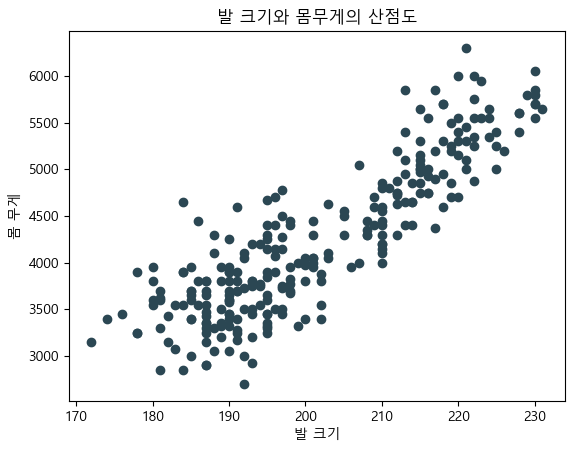

In [144]:
plt.scatter(x=x_train["flipper_length_mm"], y=y_train, color = color_list[3])
plt.title("발 크기와 몸무게의 산점도")
plt.xlabel("발 크기")
plt.ylabel("몸 무게")
plt.show()

In [132]:
x_train.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'sex'],
      dtype='object')

In [150]:
selected_x_train = x_train_preprocessed[["species_Adelie","species_Chinstrap", "species_Gentoo", "flipper_length_mm"]] #독립변수 4개
results, x_constant_train = train_linear_regression(selected_x_train, y_train)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     325.1
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           5.51e-88
Time:                        16:26:57   Log-Likelihood:                -1951.7
No. Observations:                 266   AIC:                             3911.
Df Residuals:                     262   BIC:                             3926.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2821.6297    517.28

In [145]:
#테스트셋에 대한 적합도 검정

selected_x_test = x_test_preprocessed[["species_Adelie","species_Chinstrap", "species_Gentoo", "flipper_length_mm"]] #독립변수 4개
results, x_constant_test = train_linear_regression(selected_x_test, y_test)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     73.33
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.59e-20
Time:                        16:05:11   Log-Likelihood:                -490.15
No. Observations:                  67   AIC:                             988.3
Df Residuals:                      63   BIC:                             997.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3765.1397   1088.84

In [146]:
y_train_pred = results.predict(x_constant_train)
y_test_pred = results.predict(x_constant_test)

In [147]:
print("train set R2:", r2_score(y_train, y_train_pred))
print("train set RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("test set R2:", r2_score(y_test, y_test_pred))
print("test set RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

train set R2: 0.7820458624262178
train set RMSE: 377.12260449146225
test set R2: 0.7773860855816819
test set RMSE: 363.86246560886514


In [151]:
check_multi_colinearity(selected_x_train)

,Features,VIF
2,species_Gentoo,396.941344
0,species_Adelie,339.469908
1,species_Chinstrap,174.578619
3,flipper_length_mm,4.516510


### 독립 변수 제거

In [152]:
selected_x_train = x_train_preprocessed[["species_Gentoo", "flipper_length_mm"]] #독립변수 2개
results, x_constant_train = train_linear_regression(selected_x_train, y_train)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     465.3
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           4.14e-87
Time:                        16:27:39   Log-Likelihood:                -1956.9
No. Observations:                 266   AIC:                             3920.
Df Residuals:                     263   BIC:                             3931.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3189.2709    636.85

In [153]:
check_multi_colinearity(selected_x_train)

,Features,VIF
0,species_Gentoo,1.771742
1,flipper_length_mm,1.771742


In [157]:
#테스트셋에 대한 적합도 검정

selected_x_test = x_test_preprocessed[["species_Gentoo", "flipper_length_mm"]] #독립변수 2개
results, x_constant_test = train_linear_regression(selected_x_test, y_test)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     106.9
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           3.99e-21
Time:                        16:29:43   Log-Likelihood:                -491.31
No. Observations:                  67   AIC:                             988.6
Df Residuals:                      64   BIC:                             995.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4499.2858   1344.94

In [158]:
#모델 적합도 검정

y_train_pred = results.predict(x_constant_train)
y_test_pred = results.predict(x_constant_test)

print("train set R2:", r2_score(y_train, y_train_pred))
print("train set RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("test set R2:", r2_score(y_test, y_test_pred))
print("test set RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

train set R2: 0.7742145040032409
train set RMSE: 383.83805123539634
test set R2: 0.769570975457853
test set RMSE: 370.1942728066766


### 독립 변수(성별) 추가

In [159]:
x_train_preprocessed.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
       'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_FEMALE',
       'sex_MALE', 'body_mass_g'],
      dtype='object')

In [167]:
selected_x_train = x_train_preprocessed[["species_Gentoo", "flipper_length_mm", "sex_FEMALE", "sex_MALE"]] #독립변수 4개
results, x_constant_train = train_linear_regression(selected_x_train, y_train)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     562.9
Date:                Wed, 26 Jul 2023   Prob (F-statistic):          7.25e-114
Time:                        16:39:18   Log-Likelihood:                -1891.1
No. Observations:                 266   AIC:                             3790.
Df Residuals:                     262   BIC:                             3805.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               272.9772    380.24

In [168]:
check_multi_colinearity(selected_x_train)

,Features,VIF
3,sex_MALE,519.530339
2,sex_FEMALE,455.412389
1,flipper_length_mm,5.352824
0,species_Gentoo,5.057202


In [185]:
x_train[x_train["species"]=="Gentoo"]["sex"]

264      MALE
340    FEMALE
278    FEMALE
254    FEMALE
335      MALE
        ...  
242    FEMALE
239      MALE
287      MALE
302    FEMALE
311      MALE
Name: sex, Length: 100, dtype: object

In [187]:
sex_counter

Counter({'MALE': 51, 'FEMALE': 49})

Text(0.5, 1.0, 'Gentoo 종에서 성별 데이터 비중')

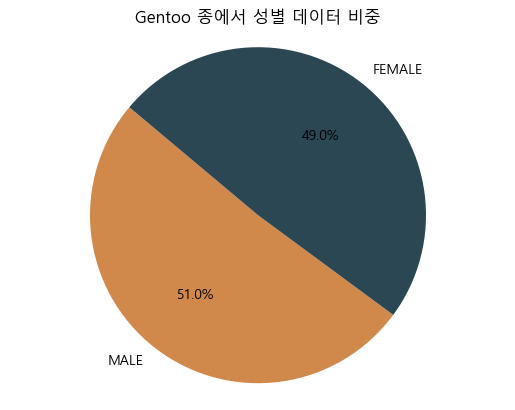

In [186]:
#gentoo종에서 남녀 비중 확인
sex_counter = Counter(x_train[x_train["species"]=="Gentoo"]["sex"])

plt.pie(sex_counter.values(), labels=sex_counter.keys(), autopct='%1.1f%%', startangle=140, colors=["#D0894B", "#2B4753"])
plt.axis('equal')  # 원의 형태를 유지함
plt.title("Gentoo 종에서 성별 데이터 비중")

#### 다른 종의 성별 비중

In [204]:
x_train["species"].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

Text(0.5, 1.0, 'Adelie 종에서 성별 데이터 비중')

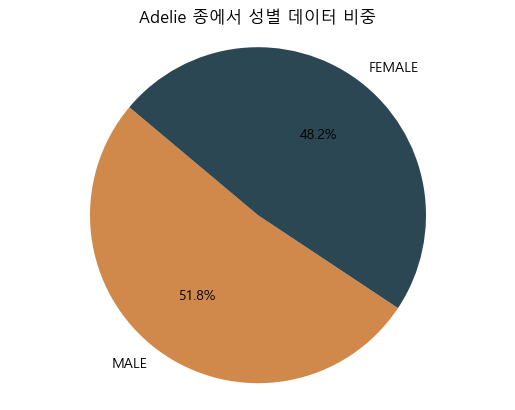

In [205]:
#gentoo종에서 남녀 비중 확인
sex_counter = Counter(x_train[x_train["species"]=="Adelie"]["sex"])

plt.pie(sex_counter.values(), labels=sex_counter.keys(), autopct='%1.1f%%', startangle=140, colors=["#D0894B", "#2B4753"])
plt.axis('equal')  # 원의 형태를 유지함
plt.title("Adelie 종에서 성별 데이터 비중")

Text(0.5, 1.0, 'Chinstrap 종에서 성별 데이터 비중')

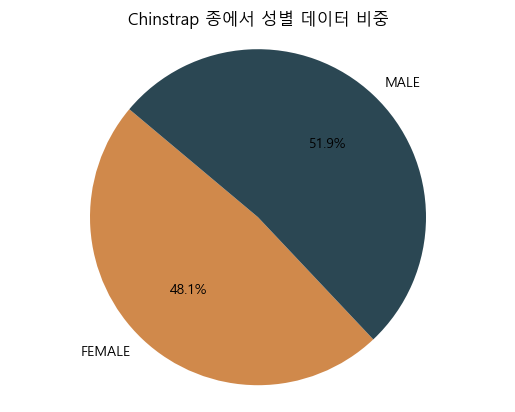

In [206]:
#gentoo종에서 남녀 비중 확인
sex_counter = Counter(x_train[x_train["species"]=="Chinstrap"]["sex"])

plt.pie(sex_counter.values(), labels=sex_counter.keys(), autopct='%1.1f%%', startangle=140, colors=["#D0894B", "#2B4753"])
plt.axis('equal')  # 원의 형태를 유지함
plt.title("Chinstrap 종에서 성별 데이터 비중")

#### 테스트 셋에 대한 적합도 검정

In [172]:
#테스트셋에 대한 적합도 검정

selected_x_test = x_test_preprocessed[["species_Gentoo", "flipper_length_mm", "sex_FEMALE", "sex_MALE"]]
results, x_constant_test = train_linear_regression(selected_x_test, y_test)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     129.2
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           7.27e-27
Time:                        16:42:01   Log-Likelihood:                -474.57
No. Observations:                  67   AIC:                             957.1
Df Residuals:                      63   BIC:                             966.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -319.5744    819.47

In [173]:
#모델 적합도 검정

y_train_pred = results.predict(x_constant_train)
y_test_pred = results.predict(x_constant_test)

print("train set R2:", r2_score(y_train, y_train_pred))
print("train set RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("test set R2:", r2_score(y_test, y_test_pred))
print("test set RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

train set R2: 0.8632471512609222
train set RMSE: 298.72267975982345
test set R2: 0.8601727023256502
test set RMSE: 288.3746544670885


In [169]:
#다중 공선성 제거

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

models = [
    ("multiple linear regression", LinearRegression()),
    ("lasso regression", Lasso(alpha=100)),
    ("ridge regression", Ridge(alpha=100)),
]

In [175]:
for name, model in models:
    model.fit(selected_x_train, y_train)
    y_pred = model.predict(selected_x_train)

    print(name)
    print("test r2:", r2_score(y_test, y_test_pred))
    print("test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print("sum of abs coefficient:", np.abs(model.coef_).sum())
    print("")

multiple linear regression
test r2: 0.8601727023256502
test RMSE: 288.3746544670885
sum of abs coefficient: 1500.646919268835

lasso regression
test r2: 0.8601727023256502
test RMSE: 288.3746544670885
sum of abs coefficient: 48.99174848141421

ridge regression
test r2: 0.8601727023256502
test RMSE: 288.3746544670885
sum of abs coefficient: 329.7044176043245



### 독립 변수 수정: 종(Gentoo)과 성별

In [196]:
selected_x_train = x_train_preprocessed[["species_Gentoo", "sex_FEMALE", "sex_MALE"]] #독립변수 4개
results, x_constant_train = train_linear_regression(selected_x_train, y_train)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     736.2
Date:                Wed, 26 Jul 2023   Prob (F-statistic):          1.75e-108
Time:                        16:55:55   Log-Likelihood:                -1907.2
No. Observations:                 266   AIC:                             3820.
Df Residuals:                     263   BIC:                             3831.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2476.7612     16.371    151.

In [181]:
check_multi_colinearity(selected_x_train)

,Features,VIF
2,sex_MALE,1.304243
1,sex_FEMALE,1.298265
0,species_Gentoo,1.000061


In [197]:
#테스트셋에 대한 적합도 검정

selected_x_test = x_test_preprocessed[["species_Gentoo", "sex_FEMALE", "sex_MALE"]] #독립변수 4개
results, x_constant_test = train_linear_regression(selected_x_test, y_test)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     161.1
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.04e-25
Time:                        16:56:04   Log-Likelihood:                -480.26
No. Observations:                  67   AIC:                             966.5
Df Residuals:                      64   BIC:                             973.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2476.6746     31.082     79.

In [198]:
#모델 적합도 검정

y_train_pred = results.predict(x_constant_train)
y_test_pred = results.predict(x_constant_test)

print("train set R2:", r2_score(y_train, y_train_pred))
print("train set RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("test set R2:", r2_score(y_test, y_test_pred))
print("test set RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

train set R2: 0.844696811218199
train set RMSE: 318.3392524259423
test set R2: 0.8342981785125483
test set RMSE: 313.9241638311156


### 독립 변수 수정: 3개의 종과 성별

In [191]:
selected_x_train = x_train_preprocessed[["species_Adelie","species_Chinstrap", "species_Gentoo",  "sex_FEMALE", "sex_MALE"]]
results, x_constant_train = train_linear_regression(selected_x_train, y_train)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     489.3
Date:                Wed, 26 Jul 2023   Prob (F-statistic):          4.92e-107
Time:                        16:54:57   Log-Likelihood:                -1907.1
No. Observations:                 266   AIC:                             3822.
Df Residuals:                     262   BIC:                             3837.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2278.9615     11.15

In [189]:
check_multi_colinearity(selected_x_train)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,species_Adelie,inf
1,species_Chinstrap,inf
2,species_Gentoo,inf
3,sex_FEMALE,inf
4,sex_MALE,inf


In [192]:
#테스트셋에 대한 적합도 검정

selected_x_test = x_test_preprocessed[["species_Adelie","species_Chinstrap", "species_Gentoo",  "sex_FEMALE", "sex_MALE"]]
results, x_constant_test = train_linear_regression(selected_x_test, y_test)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     106.1
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.36e-24
Time:                        16:54:59   Log-Likelihood:                -480.16
No. Observations:                  67   AIC:                             968.3
Df Residuals:                      63   BIC:                             977.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2266.8832     23.07

In [193]:
#모델 적합도 검정

y_train_pred = results.predict(x_constant_train)
y_test_pred = results.predict(x_constant_test)

print("train set R2:", r2_score(y_train, y_train_pred))
print("train set RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("test set R2:", r2_score(y_test, y_test_pred))
print("test set RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

train set R2: 0.8446634097570062
train set RMSE: 318.37348361145234
test set R2: 0.8348221974086606
test set RMSE: 313.42739060719526


### 독립변수 수정: 성별 - 발크기

In [199]:
x_train_preprocessed.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
       'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_FEMALE',
       'sex_MALE', 'body_mass_g'],
      dtype='object')

In [200]:
selected_x_train = x_train_preprocessed[["flipper_length_mm", "sex_FEMALE", "sex_MALE"]]
results, x_constant_train = train_linear_regression(selected_x_train, y_train)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     535.6
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.82e-93
Time:                        17:06:49   Log-Likelihood:                -1942.1
No. Observations:                 266   AIC:                             3890.
Df Residuals:                     263   BIC:                             3901.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3447.8878    215.06

In [201]:
#다중 공선성

check_multi_colinearity(selected_x_train)

,Features,VIF
2,sex_MALE,113.725837
1,sex_FEMALE,100.311316
0,flipper_length_mm,1.058520


In [202]:
#테스트셋에 대한 적합도 검정

selected_x_test = x_test_preprocessed[["flipper_length_mm", "sex_FEMALE", "sex_MALE"]]
results, x_constant_test = train_linear_regression(selected_x_test, y_test)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     138.2
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           5.93e-24
Time:                        17:07:54   Log-Likelihood:                -484.49
No. Observations:                  67   AIC:                             975.0
Df Residuals:                      64   BIC:                             981.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3642.2303    464.29

In [203]:
#모델 적합도 검정

y_train_pred = results.predict(x_constant_train)
y_test_pred = results.predict(x_constant_test)

print("train set R2:", r2_score(y_train, y_train_pred))
print("train set RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("test set R2:", r2_score(y_test, y_test_pred))
print("test set RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

train set R2: 0.8006872986792007
train set RMSE: 360.6346844671635
test set R2: 0.8119999009075165
test set RMSE: 334.3798849395617


### 독립변수: 성별

In [207]:
selected_x_train = x_train_preprocessed[["sex_FEMALE", "sex_MALE"]]
results, x_constant_train = train_linear_regression(selected_x_train, y_train)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     51.25
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           8.07e-12
Time:                        17:27:14   Log-Likelihood:                -2134.5
No. Observations:                 266   AIC:                             4273.
Df Residuals:                     264   BIC:                             4280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2823.0408     30.344     93.033      0.0

### 독립변수: 연속형 변수

In [208]:
x_train_preprocessed.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
       'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_FEMALE',
       'sex_MALE', 'body_mass_g'],
      dtype='object')

In [209]:
selected_x_train = x_train_preprocessed[["flipper_length_mm", "culmen_length_mm", "culmen_depth_mm"]]
results, x_constant_train = train_linear_regression(selected_x_train, y_train)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     281.6
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.19e-81
Time:                        17:32:29   Log-Likelihood:                -1966.5
No. Observations:                 266   AIC:                             3941.
Df Residuals:                     262   BIC:                             3955.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6287.6148    638.81

In [210]:
#다중 공선성

check_multi_colinearity(selected_x_train)

,Features,VIF
0,flipper_length_mm,139.940296
1,culmen_length_mm,110.360704
2,culmen_depth_mm,36.466212


In [213]:
#테스트셋에 대한 적합도 검정

selected_x_test = x_test_preprocessed[["flipper_length_mm", "culmen_length_mm", "culmen_depth_mm"]]
results, x_constant_test = train_linear_regression(selected_x_test, y_test)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     66.58
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.63e-19
Time:                        17:34:18   Log-Likelihood:                -492.64
No. Observations:                  67   AIC:                             993.3
Df Residuals:                      63   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7072.2679   1263.31

In [214]:
#모델 적합도 검정

y_train_pred = results.predict(x_constant_train)
y_test_pred = results.predict(x_constant_test)

print("train set R2:", r2_score(y_train, y_train_pred))
print("train set RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("test set R2:", r2_score(y_test, y_test_pred))
print("test set RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

train set R2: 0.7581784264997578
train set RMSE: 397.23501841703677
test set R2: 0.7602268213610622
test set RMSE: 377.6255799466139
